<a href="https://colab.research.google.com/github/Mapach33/Pcs_Quimica/blob/main/Cinetica_Quimica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/aymericdamien/TensorFlow-Examples/


https://dontpad.com/transition_state




In [ ]:
! pip install rdkit
! pip install pyscf


# Creating structures from SMILES

Molecules can be represented as strings with SMILES. Simplified molecular-input line-entry system (SMILES) is a string based representation of a molecule. (https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) For example n-butane is represented as CCCC. Interactive RDKit demo for SMILES is available at https://rdkit.org/temp/demo/demo.html

If you want to draw a 2D structure of molecule and obtain the SMILES representation, use this link https://pubchem.ncbi.nlm.nih.gov//edit3/index.html

In [ ]:
# import these definitions
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

Let us see how to visualize the 2D structure of toluene using SMILES

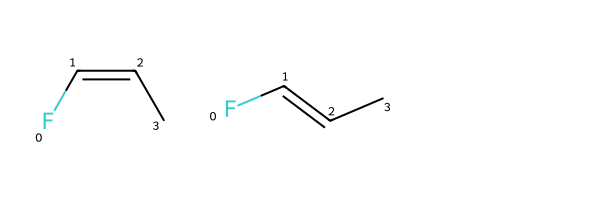

In [ ]:
# set SMILES for toluene
smiles_sisButeno = "F\C=C/C"
smiles_Trans = "F/C=C/C"

# Convert to RDKit molecule
mol_sis = Chem.MolFromSmiles(smiles_sisButeno)
mol_trans = Chem.MolFromSmiles(smiles_Trans)

# Draw the strucutre
Draw.MolsToGridImage([mol_sis,mol_trans])
#Draw.MolsToGridImage([mol_trans])

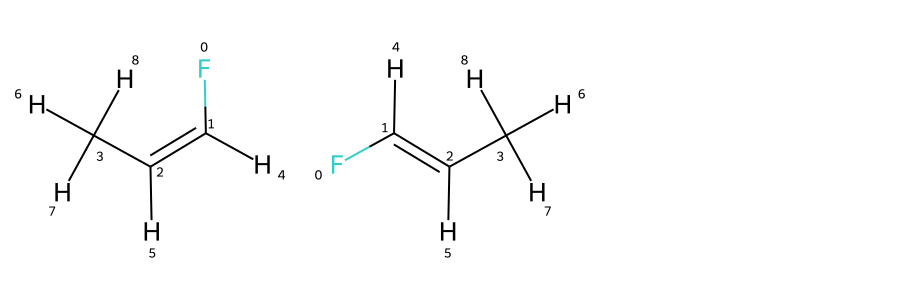

In [ ]:

# Add hydrogens
mol_h_sis = Chem.AddHs(mol_sis)
mol_h_trans = Chem.AddHs(mol_trans)

# Display both structures
Draw.MolsToGridImage([mol_h_sis,mol_h_trans], subImgSize=(300,300))



The structure generated has implicit hydrogen atoms. We will need explicit hydrogen atoms to generate the input structure

In [ ]:
# The current molecule has z = 0 for all atoms
# This is a 2D molecule
print(Chem.MolToMolBlock(mol_h_trans))
print(Chem.MolToMolBlock(mol_h_sis))


     RDKit          2D

  9  8  0  0  0  0  0  0  0  0999 V2000
   -0.7500   -1.2990    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.2500   -1.2990    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    2.5981    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.5490    0.5490    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.9510    2.0490    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  2  5  1  0
  3  6  1  0
  4  7  1  0
  4  8  1  0
  4  9  1  0
M  END


     RDKit          2D

  9  8  0  0  0  0  0  0  0  0999 V2000
   -0.7500   -1.2990    0.0000 F   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0 

In [ ]:
# Let us make it 3D by generating a random conformer
Chem.AllChem.EmbedMolecule(mol_h_trans)
Chem.AllChem.EmbedMolecule(mol_h_sis)

# look at the molecule again
print(Chem.MolToMolBlock(mol_h_sis))
print(Chem.MolToMolBlock(mol_h_trans))


     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
    1.1563    1.5089    0.5630 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.2793    0.2655    0.0324 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2531   -0.5246   -0.2439 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0998   -0.0070    0.0488 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2881   -0.0949   -0.1750 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.4144   -1.5112   -0.6684 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2118    0.9967   -0.4167 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8771   -0.7108   -0.3044 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2025    0.0773    1.1642 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  2  5  1  0
  3  6  1  0
  4  7  1  0
  4  8  1  0
  4  9  1  0
M  END


     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
    2.5434    0.1059    0.0368 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.2801   -0.3612    0.0499 C   0  0  0  0  0  0  0  0 

In [ ]:
# Save the molecule in XYZ format for future use
Chem.MolToXYZFile(mol_h_sis,"sis.xyz")
Chem.MolToXYZFile(mol_h_trans,"trans.xyz")

Conformer generation is an active area of research.

1.   https://www.rdkit.org/UGM/2012/Ebejer_20110926_RDKit_1stUGM.pdf
2.   https://pubs.acs.org/doi/10.1021/acs.jcim.0c00025

# Manipulating the 3D structure

As we saw earlier the 3D conformer is randonly generated. But we want to modify the structure before starting any quantum chemistry calculations. Wrong structures or incorrect geometries lead to bad estimates.

For demonstration we will use biphenyl and change the angle between two benzene rings.

To enable numbering of atoms, set the draw options

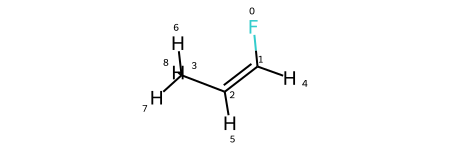

In [ ]:
# create the 3D structure of cis
mol_h_sis

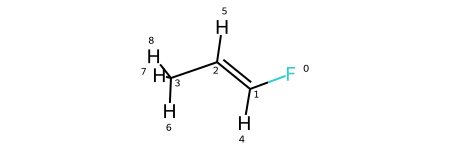

In [ ]:
mol_h_trans

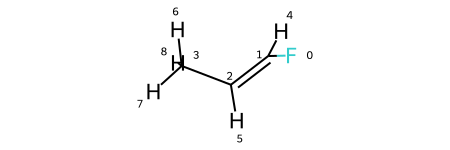

In [ ]:
# set the value to 90 for the conformer
Chem.AllChem.SetDihedralDeg(mol_h_sis.GetConformer(0),3,2,1,0,90.0)

# save the new conformer
Chem.MolToXYZFile(mol_h_sis, "moltrs.xyz")

# Looks like it is set to 90
mol_h_sis

In [ ]:
#Crea una lista con diferentes diedros
diedros = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
mol_lista = []
for i in diedros:
  Chem.AllChem.SetDihedralDeg(mol.GetConformer(0),4,3,6,11,i)
  #mol_lista.append(mol)
  Chem.MolToXYZFile(mol, f"{i}.xyz")

## Exercise

Generate the 3D structure of cis-butene and trans butene.

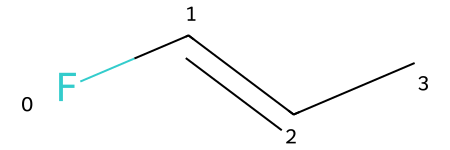

In [ ]:
smiles = "F/C=C/C"
#F/C(Br)=C(/Cl)I

mol = Chem.MolFromSmiles(smiles)
mol

\

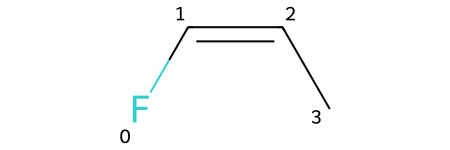

In [ ]:
smiles = "F\C=C/C"
mol = Chem.MolFromSmiles(smiles)
mol

# Combinatorial genration

To study the effect of functional group substitution, we need to create a library of molecules replaing the functional group. We can do that with combinatorial method. We will consider benzene core and some functional groups

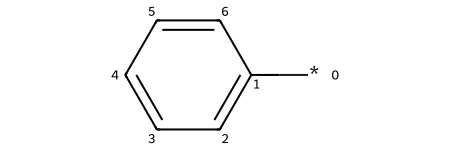

In [ ]:
# generate the core molcule
core = Chem.MolFromSmiles('*c1ccccc1')
core

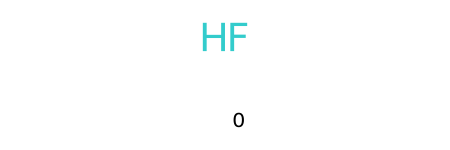

In [ ]:
# For simplicity let's use one functional group
functional_group = "F"
functional_mol = Chem.MolFromSmiles(functional_group)
functional_mol

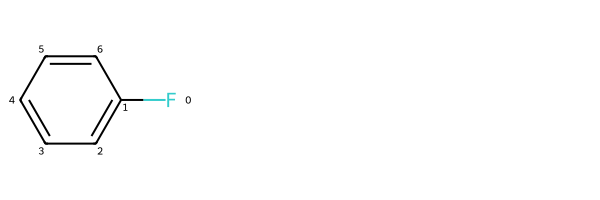

In [ ]:
# generate the combined molecule
product = Chem.ReplaceSubstructs(core,Chem.MolFromSmarts('[#0]'),functional_mol)
new_smiles = Chem.MolToSmiles(product[0])
new_mol = Chem.MolFromSmiles(new_smiles)

# Draw the new molecule
Draw.MolsToGridImage([new_mol])

Now do it for multiple functional groups

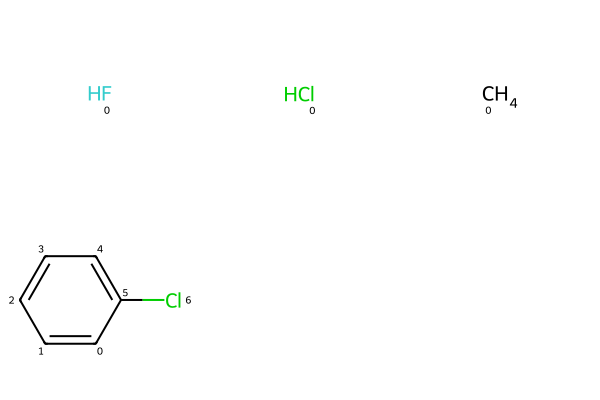

In [ ]:
# create a list of functional groups
functional_groups = ['F','Cl','C','c1ccccc1Cl']
functional_mols = [Chem.MolFromSmiles(group) for group in functional_groups]

# Draw the groups
Draw.MolsToGridImage(functional_mols)

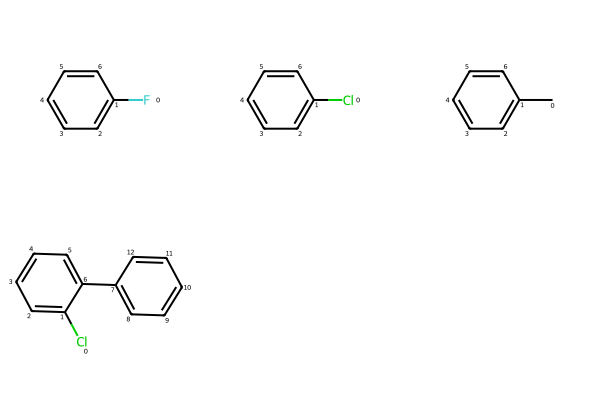

In [ ]:
product_smi = []
for functional_mol in functional_mols:
    product_mol = Chem.ReplaceSubstructs(core,Chem.MolFromSmarts('[#0]'),functional_mol)
    product_smi.append(Chem.MolToSmiles(product_mol[0]))
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in product_smi])


# PySCF

El Marco de Simulaciones de Química basado en Python (PySCF) es una colección de módulos de estructura electrónica de código abierto impulsados por Python. El paquete proporciona una plataforma simple, ligera y eficiente para cálculos de química cuántica y desarrollo de metodología. PySCF se puede utilizar para simular las propiedades de moléculas, cristales y Hamiltonianos personalizados utilizando métodos de campo medio y poscampo medio. Para garantizar la facilidad de extensibilidad, casi todas las características en PySCF están implementadas en Python, mientras que las partes computacionalmente críticas están implementadas y optimizadas en C. Utilizando esta implementación combinada de Python/C, el paquete es tan eficiente como los mejores programas de química cuántica basados en C o Fortran existentes. Además de sus bibliotecas principales, PySCF admite un rico ecosistema de extensiones de instalación de PySCF.

# Running DFT calculation

We will use PySCF which is open-source software for running quantum chemistry calculations. You can find more details here - https://pyscf.org/

More tutorials and example files for PySCF are available at https://github.com/pyscf/pyscf/tree/master/examples

In [ ]:
# import the package
from pyscf import gto, scf

We need a 3D structure input to PSI4. Then we set other parameters - DFT functional, basis set, charge. Details about the parametrs will be discussed in the next session.

In [ ]:
# reading the xyz into PSI4 - first open the file the pass it to PSI4
mol = gto.M(atom="toluene.xyz")

In [ ]:
# set basis set
mol.basis = "3-21G"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

/usr/local/lib/python3.10/dist-packages/pyscf/dft/libxc.py:772: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, the same to the B3LYP functional in Gaussian and ORCA (issue 1480). To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [ ]:
# run calculation to get total energy
mf.kernel()

converged SCF energy = -268.249711620892


-268.2497116208924

In [ ]:
resultados = [mf.kernel() ]

mol = gto.M(atom="toluene.xyz")
mol.basis = "3-21G"
mf = mol.KS()
mf.xc = 'b3lyp'

In [ ]:
i

'0.xyz'

inicio: 01:22

fin: 01:28

In [ ]:
#Crea una lista con diferentes diedros
moleculas_diedros = ["0.xyz", "30.xyz", "60.xyz", "90.xyz", "120.xyz",
                    "150.xyz", "180.xyz", "240.xyz", "300.xyz", "330.xyz"]
diedros_lista = []
for i in moleculas_diedros:
  mol = gto.M(atom=i)
  mol.basis = "3-21G"
  mf = mol.KS()
  mf.xc = 'b3lyp'
  #mf.kernel()
  diedros_lista.append(mf.kernel())

converged SCF energy = -457.616472923339
converged SCF energy = -457.619538758846
converged SCF energy = -457.617354855824
converged SCF energy = -457.614529341006
converged SCF energy = -457.617292324795
converged SCF energy = -457.619578855683
converged SCF energy = -457.616602007663
converged SCF energy = -457.617341845237
converged SCF energy = -457.617311503817
converged SCF energy = -457.619549994541


In [ ]:
diedros_lista

[-457.6164729233386,
 -457.6195387588457,
 -457.61735485582415,
 -457.614529341006,
 -457.6172923247947,
 -457.61957885568347,
 -457.616602007663,
 -457.6173418452373,
 -457.6173115038167,
 -457.619549994541]

In [ ]:
# Normalizaremos solo con fines de visualización
min_y = min(diedros_lista)
max_y = max(diedros_lista)
diedros_lista_norm = [(valor - min_y) / (max_y - min_y) for valor in diedros_lista]

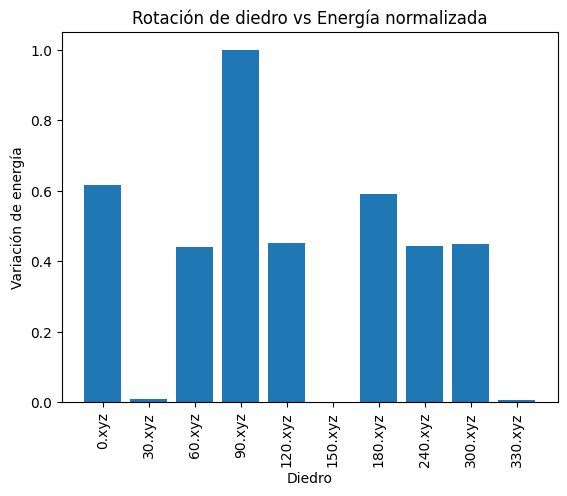

In [ ]:
import matplotlib.pyplot as plt

plt.bar(moleculas_diedros,diedros_lista_norm)
plt.xlabel('Diedro')
plt.ylabel('Variación de energía')
plt.xticks(rotation=90)
plt.title('Rotación de diedro vs Energía normalizada')
plt.show()

# Ejercicio

Calcula la energía para cis-buteno y trans-buteno. Determina cual es más estable (valor más negativo de energía SCF).